Default Model From pytorch

In [1]:
import torch

from ConceptBottleneck.CUB.models import ModelXtoC

model = torch.hub.load('pytorch/vision:v0.10.0', 'inception_v3', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to C:\Users\cheng/.cache\torch\hub\v0.10.0.zip
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to C:\Users\cheng/.cache\torch\hub\checkpoints\inception_v3_google-0cc3c7bd.pth
22.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

68.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [2]:
from PIL import Image
import torch.utils.model_zoo as model_zoo
from torchvision import transforms
input_image = Image.open('docs/dog.jpg')
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

In [3]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
  output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 1.5696e-01,  1.1051e-01, -4.4363e-01, -6.1477e-02, -2.0094e-01,
         1.6820e-01,  5.8117e-01,  6.0334e-02, -7.7651e-02, -1.1192e+00,
        -2.1800e-01, -5.2624e-01, -1.1816e-01,  6.6277e-02,  8.4988e-01,
        -5.3259e-02, -4.7113e-01, -2.5980e-03,  2.7504e-01,  1.7060e-01,
         4.4231e-01, -3.8615e-01,  1.3482e-01, -5.2201e-01, -3.3516e-04,
        -2.3492e-01, -2.3264e-01, -7.1883e-03,  1.6899e-02, -1.2724e-01,
         2.0508e-01, -6.9888e-03,  1.3074e+00, -2.3181e-01,  9.8966e-01,
        -7.7782e-01,  4.8900e-01, -4.2243e-01, -2.6523e-01, -1.5005e-01,
         3.5147e-01, -1.7462e-01,  1.0251e-01,  4.2223e-01, -1.4342e-01,
         1.3578e-02, -4.6477e-01,  3.5966e-01,  1.5194e-01,  2.0217e-01,
        -1.3763e-01,  1.4986e-01,  2.8415e-01, -3.7086e-01,  9.7689e-01,
         7.9543e-01, -7.4032e-01, -7.8852e-02, -9.6364e-02,  1.2193e-01,
        -1.2712e-01,  3.6825e-01, -4.5354e-01, -7.4801e-01, -7.9354e-02,
         2.1688e-01,  2.7018e-01,  1.0089e+00,  4.0

In [ ]:
ModelXtoC(pretrained = True, freeze = True, num_classes = 200, use_aux = True, n_attributes = 112, expand_dim, three_class)

In [21]:
!python ConceptBottleneck\experiments.py cub Concept_XtoC --seed 1 -ckpt 1 -log_dir D:\pycharmPool\outputs\outputs -e 1000 \
 -optimizer sgd -pretrained -use_aux -use_attr -weighted_loss multiple -data_dir D:\pycharmPool\DataFile\class_attr_data_10 \
 -n_attributes 112 -normalize_loss -b 64 -weight_decay 0.00004 -lr 0.01 -scheduler_step 1000 -bottleneck

Namespace(attr_loss_weight=1.0, batch_size=64, bottleneck=True, ckpt='1', connect_CY=False, data_dir='D:\\pycharmPool\\DataFile\\class_attr_data_10', dataset='cub', end2end=False, epochs=1000, exp='Concept_XtoC', expand_dim=0, freeze=False, image_dir='images', log_dir='D:\\pycharmPool\\outputs\\outputs', lr=0.01, n_attributes=112, n_class_attr=2, no_img=False, normalize_loss=True, optimizer='sgd', pretrained=True, resampling=False, save_step=1000, scheduler_step=1000, seed=1, three_class=False, uncertain_labels=False, use_attr=True, use_aux=True, use_relu=False, use_sigmoid=False, weight_decay=4e-05, weighted_loss='multiple')
[10.783783783783784, 15.76923076923077, 1.463276836158192, 3.116738197424893, 3.0851788756388414, 3.4613953488372093, 14.724590163934426, 1.4136889783593358, 3.8888888888888893, 6.773095623987034, 3.3560399636693914, 2.815433571996818, 11.050251256281408, 1.430816016218956, 4.68920521945433, 7.08768971332209, 16.06761565836299, 8.787755102040816, 6.001459854014598

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to C:\Users\cheng/.cache\torch\hub\checkpoints\inception_v3_google-1a9a5a14.pth

0.0%
0.0%
0.0%
0.0%
0.0%
0.0%
0.1%
0.1%
0.1%
0.1%
0.1%
0.1%
0.1%
0.1%
0.1%
0.1%
0.1%
0.1%
0.1%
0.2%
0.2%
0.2%
0.2%
0.2%
0.2%
0.2%
0.2%
0.2%
0.2%
0.2%
0.2%
0.2%
0.2%
0.3%
0.3%
0.3%
0.3%
0.3%
0.3%
0.3%
0.3%
0.3%
0.3%
0.3%
0.3%
0.3%
0.4%
0.4%
0.4%
0.4%
0.4%
0.4%
0.4%
0.4%
0.4%
0.4%
0.4%
0.4%
0.4%
0.5%
0.5%
0.5%
0.5%
0.5%
0.5%
0.5%
0.5%
0.5%
0.5%
0.5%
0.5%
0.5%
0.5%
0.6%
0.6%
0.6%
0.6%
0.6%
0.6%
0.6%
0.6%
0.6%
0.6%
0.6%
0.6%
0.6%
0.7%
0.7%
0.7%
0.7%
0.7%
0.7%
0.7%
0.7%
0.7%
0.7%
0.7%
0.7%
0.7%
0.8%
0.8%
0.8%
0.8%
0.8%
0.8%
0.8%
0.8%
0.8%
0.8%
0.8%
0.8%
0.8%
0.9%
0.9%
0.9%
0.9%
0.9%
0.9%
0.9%
0.9%
0.9%
0.9%
0.9%
0.9%
0.9%
0.9%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.0%
1.1%
1.1%
1.1%
1.1%
1.1%
1.1%
1.1%
1.1%
1.1%
1.1%
1.1%
1.1%
1.1%
1.2%
1.2%
1.2%
1.2%
1.2%
1.2%
1.2%
1.2%
1.2%
1.2%
1.2%
1.2%
1.2%
1.2%
1.3%


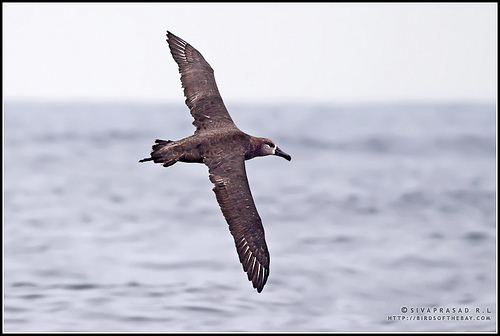

In [23]:
from PIL import Image
Image.open("D:\\pycharmPool\\SpecialConceptBottleneck\\CUB_200_2011\\images\\001.Black_footed_Albatross\\Black_Footed_Albatross_0009_34.jpg")